# Analysis of inflection points

Determines the relationship between treatment time $\mathrm{T_H}$ and the two inflection point times, $\mathrm{T1}$ and $\mathrm{T2}$, and also the relationship between the two inflection points.

In [1]:
import sys,os
import numpy as np
import pandas as pd
import scipy.optimize as optim
import functions
import glob
from scipy.stats import gamma
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as st
import matplotlib.font_manager as font_manager
from scipy.stats import t

In [2]:
data_directory = './data/'
os.chdir(data_directory)
cwd = os.getcwd()

studies = glob.glob('Study*')
studies.sort()

In [3]:
inflection_points = {}
dof = -2 # Two parameters in the linear models

for s in studies:
    os.chdir(s)
    
    inflection_points[s] = pd.read_csv('gompertz_inflection_points_summary.csv')
    
    dof += len(inflection_points[s]['CT'])
    
    os.chdir(cwd)
    
print('Degrees of freedom: ',dof)

Degrees of freedom:  26


In [4]:
tinv = lambda p, df: abs(t.ppf(p/2,df))
ts = tinv(0.05,dof)
print(ts)

2.0555294386428713


**Relationship between $\mathrm{T_H}$ and $\mathrm{T1}$.**

In [5]:
res = functions.fit_data(inflection_points,'CT','T1')

s_err = ts*res.stderr
i_err = ts*res.intercept_stderr

In [6]:
fitname = r'T1 = $(' + str(round(res.slope,2)) + '\pm ' + str(round(s_err,2)) + ')\mathrm{T_H} + ' 
fitname += '(' + str(round(res.intercept,2)) + '\pm ' + str(round(i_err,2)) + ')$'

x = np.linspace(0,80,100)
y = res.slope*x + res.intercept

r_text = r'$\mathrm{R}^2 = ' + str(round(res.rvalue**2,3)) + '$'

reduced_chi = functions.reduced_chi_square(inflection_points,'CT','T1',res.slope,res.intercept)

reduced_chi_text = r'$\sqrt{\mathrm{Reduced} \; \chi^2}$ = '+str(round(reduced_chi,2))+' h'

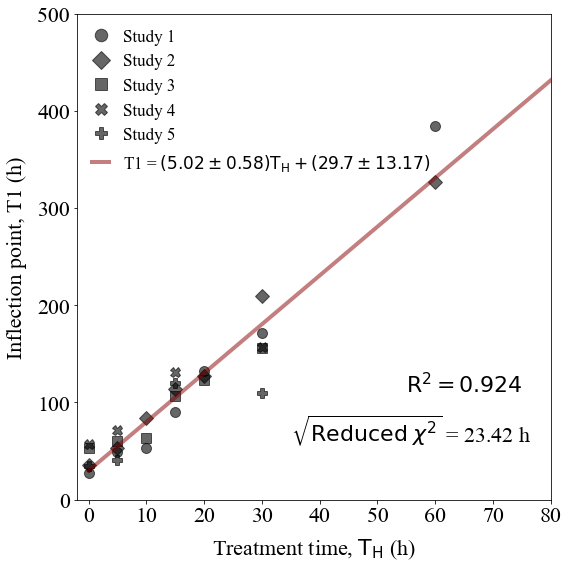

In [7]:
fig, axs = plt.subplots(figsize=(8,8))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

marker_list = {'Study1':'o','Study2':'D','Study3':'s','Study4':'X','Study5':'P'}

for s in studies:
    labelname = s.replace('Study','Study ')
    plt.plot(inflection_points[s]['CT'],inflection_points[s]['T1'],marker=marker_list[s],ms=10,color='black',alpha=0.6,linewidth=0,label=labelname)

plt.plot(x,y,linewidth=4,color='#880000',alpha=0.5,label=fitname)

plt.text(55,110,r_text,fontsize=22)
plt.text(35,60,reduced_chi_text,fontsize=22)
    
plt.xticks(size=22)
plt.yticks(size=22)  
plt.xlabel(r'Treatment time, $\mathrm{T_H}$ (h)',size=22,labelpad=10)
plt.ylabel(r'Inflection point, T1 (h)',size=22,rotation=90,labelpad=10)
plt.xlim(-2,80)
plt.ylim(0,500)
plt.legend(frameon=False,prop={'size': 17,'family':'Times New Roman'},markerscale=1.25,handlelength=1.0,loc='upper left')
plt.tight_layout()

plt.savefig('THT1.png',dpi=300)

**Relationship between $\mathrm{T_H}$ and $\mathrm{T2}$.**

In [8]:
res = functions.fit_data(inflection_points,'CT','T2')

s_err = ts*res.stderr
i_err = ts*res.intercept_stderr

In [10]:
fitname = r'$\mathrm{T2} = (' + str(round(res.slope,2)) + '\pm ' + str(round(s_err,2)) + ')\mathrm{T_H} + ' 
fitname += '(' + str(round(res.intercept,2)) + '\pm ' + str(round(i_err,2)) + ')$'

x = np.linspace(0,80,100)
y = res.slope*x + res.intercept

r_text = r'$\mathrm{R}^2 = ' + str(round(res.rvalue**2,3)) + '$'

reduced_chi = functions.reduced_chi_square(inflection_points,'CT','T2',res.slope,res.intercept)

reduced_chi_text = r'$\sqrt{\mathrm{Reduced} \; \chi^2}$ = '+str(round(reduced_chi,2))+' h'

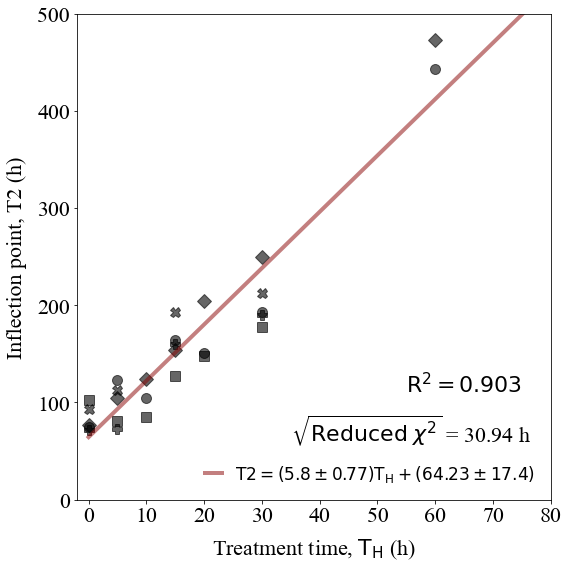

In [11]:
fig, axs = plt.subplots(figsize=(8,8))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

marker_list = {'Study1':'o','Study2':'D','Study3':'s','Study4':'X','Study5':'P'}

for s in studies:
    labelname = s.replace('Study','Study ')
    plt.plot(inflection_points[s]['CT'],inflection_points[s]['T2'],marker=marker_list[s],ms=10,color='black',alpha=0.6,linewidth=0)

plt.plot(x,y,linewidth=4,color='#880000',alpha=0.5,label=fitname)

plt.text(55,110,r_text,fontsize=22)
plt.text(35,60,reduced_chi_text,fontsize=22)
    
plt.xticks(size=22)
plt.yticks(size=22)  
plt.xlabel(r'Treatment time, $\mathrm{T_H}$ (h)',size=22,labelpad=10)
plt.ylabel(r'Inflection point, T2 (h)',size=22,rotation=90,labelpad=10)
plt.xlim(-2,80)
plt.ylim(0,500)
plt.legend(frameon=False,prop={'size': 17,'family':'Times New Roman'},markerscale=1.25,handlelength=1.0,loc='lower right')
plt.tight_layout()
plt.savefig('THT2.png',dpi=300)

**Relationship between $\mathrm{T1}$ and $\mathrm{T2}$.**

In [12]:
res = functions.fit_data(inflection_points,'T1','T2')

s_err = ts*res.stderr
i_err = ts*res.intercept_stderr

In [14]:
fitname = r'$\mathrm{T2} = (' + str(round(res.slope,2)) + '\pm ' + str(round(s_err,2)) + ')\mathrm{T1} + ' 
fitname += '(' + str(round(res.intercept,2)) + '\pm ' + str(round(i_err,2)) + ')$'

x = np.linspace(0,600,100)
y = res.slope*x + res.intercept

r_text = r'$\mathrm{R}^2 = ' + str(round(res.rvalue**2,3)) + '$'

reduced_chi = functions.reduced_chi_square(inflection_points,'T1','T2',res.slope,res.intercept)

reduced_chi_text = r'$\sqrt{\mathrm{Reduced} \; \chi^2}$ = '+str(round(reduced_chi,2))+' h'

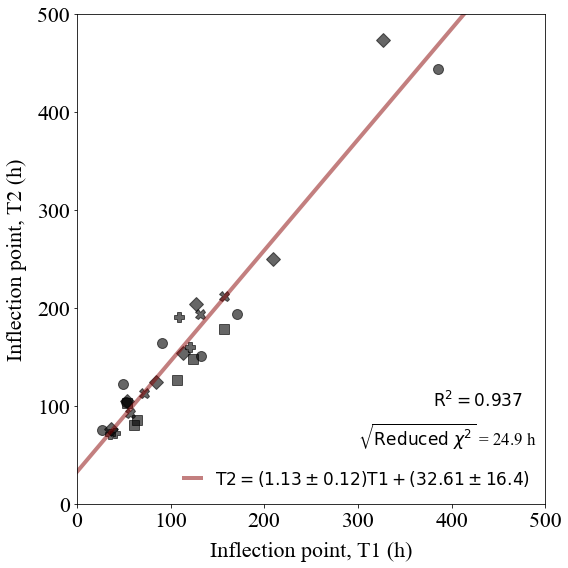

In [15]:
fig, axs = plt.subplots(figsize=(8,8))

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']

marker_list = {'Study1':'o','Study2':'D','Study3':'s','Study4':'X','Study5':'P'}

for s in studies:
    labelname = s.replace('Study','Study ')
    plt.plot(inflection_points[s]['T1'],inflection_points[s]['T2'],marker=marker_list[s],ms=10,color='black',alpha=0.6,linewidth=0)

plt.plot(x,y,linewidth=4,color='#880000',alpha=0.5,label=fitname)
plt.text(380,100,r_text,fontsize=17)
plt.text(300,60,reduced_chi_text,fontsize=17)
    
plt.xticks(size=22)
plt.yticks(size=22)  
plt.xlabel('Inflection point, T1 (h)',size=22,labelpad=10)
plt.ylabel('Inflection point, T2 (h)',size=22,rotation=90,labelpad=10)
plt.xlim(0,500)
plt.ylim(0,500)
plt.legend(frameon=False,prop={'size': 17,'family':'Times New Roman'},markerscale=1.25,handlelength=1.0,loc='lower right')
plt.tight_layout()
plt.savefig('T1T2.png',dpi=300)